# Modelos con subject procesada, text y title

## Librerías

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import hstack
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('/Users/isaromobru/Desktop/FakeNews 10.57.24/proyecto_machine_learning_Fake_News/data/processed/archivo.csv')

In [99]:
df

,title,text,subject,date,label,text_length,title_length,text_word_count,title_word_count,subject_grouped
0,U.S. budget fight loom Republicans flip fiscal...,WASHINGTON Reuters head conservative republica...,politicsNews,"December 31, 2017",1,3293,53,469,8,politics
1,U.S. military accept transgender recruit Monda...,WASHINGTON Reuters Transgender people allow fi...,politicsNews,"December 29, 2017",1,2930,56,397,7,politics
2,senior U.S. republican senator let Mr. Mueller...,WASHINGTON Reuters special counsel investigati...,politicsNews,"December 31, 2017",1,1939,50,272,8,politics
3,FBI Russia probe help australian diplomat tip NYT,WASHINGTON Reuters trump campaign adviser Geor...,politicsNews,"December 30, 2017",1,1755,49,241,8,politics
4,trump want Postal Service charge much Amazon s...,SEATTLE WASHINGTON Reuters President Donald Tr...,politicsNews,"December 29, 2017",1,3632,53,530,8,politics
...,...,...,...,...,...,...,...,...,...,...
44684,mcpain John McCain Furious Iran treat US Sailo...,21st Century Wire say 21wire report early week...,Middle-east,"January 16, 2016",0,2291,53,321,9,general
44685,justice Yahoo Settles E mail Privacy Class act...,21st Century Wire say familiar theme whenever ...,Middle-east,"January 16, 2016",0,1102,70,173,14,general
44686,Sunnistan US Allied safe zone plan take Territ...,Patrick Henningsen 21st Century WireRemember...,Middle-east,"January 15, 2016",0,16869,72,2402,11,general
44687,blow $ 700 million Al Jazeera America finally ...,21st Century Wire say Al Jazeera America go hi...,Middle-east,"January 14, 2016",0,1858,55,284,10,general


In [4]:
le = LabelEncoder()
df['subject_encoded'] = le.fit_transform(df['subject_grouped'])


In [5]:
from scipy.sparse import csr_matrix, hstack
# Eliminar Na
df['text'] = df['text'].fillna("")

# Vectoriza la columna 'text'
vectorizer_text = TfidfVectorizer(max_features=5000)
X_text = vectorizer_text.fit_transform(df['text'])

# Vectoriza la columna 'title'
vectorizer_title = TfidfVectorizer(max_features=1000)
X_title = vectorizer_title.fit_transform(df['title'])

# Convierte la columna 'subject_encoded' a una matriz dispersa
subject_feature = csr_matrix(df['subject_encoded'].values.reshape(-1, 1))

# Combina las tres fuentes de información en una única matriz de características
X = hstack([subject_feature, X_title, X_text])

# Define la variable objetivo; en este ejemplo, se asume que la columna "label" es la etiqueta a predecir
y = df['label']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Regresión Logística

In [6]:

# Entrenar el modelo de Regresión Logística
logreg_model = LogisticRegression(max_iter=500, solver='liblinear')  # Solver optimizado para datos grandes
logreg_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_logreg = logreg_model.predict(X_test)

# Evaluar el modelo
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
class_report_logreg = classification_report(y_test, y_pred_logreg)

# Mostrar los resultados
conf_matrix_logreg, class_report_logreg

(array([[4607,   41],
        [  40, 4250]]),
 '              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99      4648\n           1       0.99      0.99      0.99      4290\n\n    accuracy                           0.99      8938\n   macro avg       0.99      0.99      0.99      8938\nweighted avg       0.99      0.99      0.99      8938\n')

El modelo indica unos valores muy altos.
- Precisión= 0,99, lo que quiere decir un 99% de precisión 
- f1-score y Recall= Respectivamente estos indicadores muestran que tan bien el modelo encuentra todos los casos de una clase y el balance entre precisión y recall, en nuestro caso un 0,99

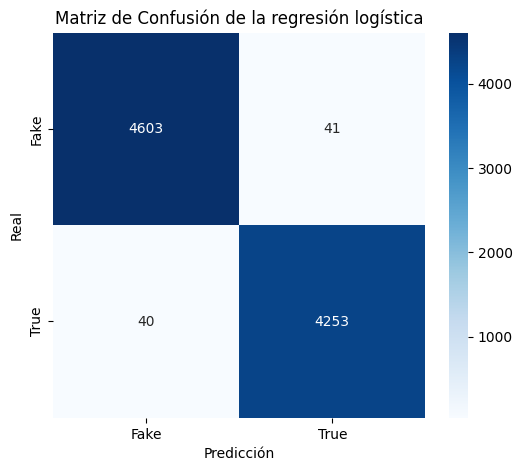

In [7]:
# Definir valores de la matriz de confusión
cm = np.array([[4603, 41],
               [40, 4253]])

# Etiquetas de las clases
labels = ['Fake', 'True']

# Graficar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión de la regresión logística')
plt.show();


📌 Interpretación:

4607 → Verdaderos negativos (clase 0 correctamente clasificada).
41 → Falsos positivos (clase 0 mal clasificada como clase 1).
40 → Falsos negativos (clase 1 mal clasificada como clase 0).
4250 → Verdaderos positivos (clase 1 correctamente clasificada).

In [6]:
# Obtener la cantidad total de palabras vectorizadas
print(len(logreg_model.coef_[0]))

# Obtener la lista de palabras del vocabulario
vectorizer_text.get_feature_names_out()

# Montamos un diccionario con palabra -> coeficiente
feature_to_coef = {
    word: coef for word, coef in zip(
        vectorizer_text.get_feature_names_out(), logreg_model.coef_[0]
    )
}

# Opcional: Mostrar las palabras más relevantes (ordenadas por importancia)
sorted_features = sorted(feature_to_coef.items(), key=lambda x: x[1], reverse=True)
print("Palabras más importantes:", sorted_features[:10])

6001
Palabras más importantes: [('vp', 19.806783077313852), ('world', 13.431028672045159), ('ship', 5.768051345749991), ('venture', 4.424975667636147), ('turkey', 4.276130762213797), ('anger', 3.8268067209840106), ('mix', 3.6830594078764314), ('sandy', 3.6519900159205805), ('shooting', 3.148193005532501), ('temporary', 3.0461448396580035)]


In [7]:

for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:5]:
    print(best_positive)
    
print('################################')
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:5]:
    print(best_negative)

('vp', 19.806783077313852)
('world', 13.431028672045159)
('ship', 5.768051345749991)
('venture', 4.424975667636147)
('turkey', 4.276130762213797)
################################
('colin', -9.241566962320745)
('93', -5.601616126110102)
('turnbull', -4.956994103618296)
('papadopoulos', -4.680230764855905)
('manner', -4.548194398340765)


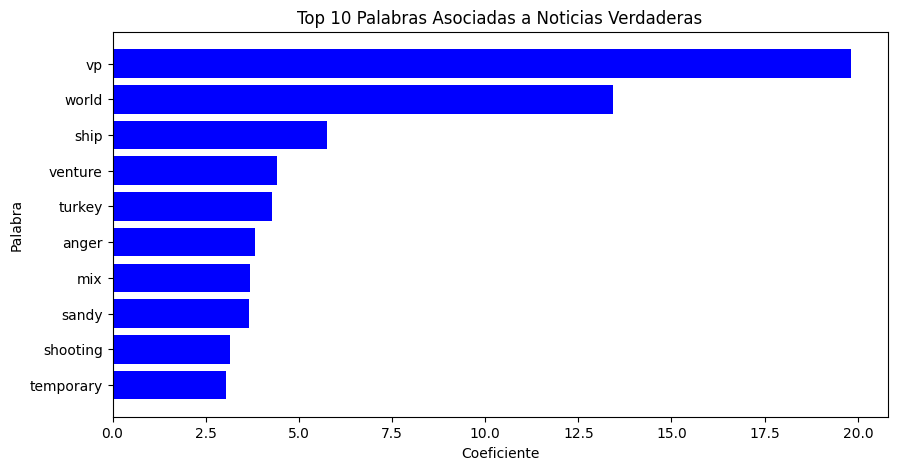

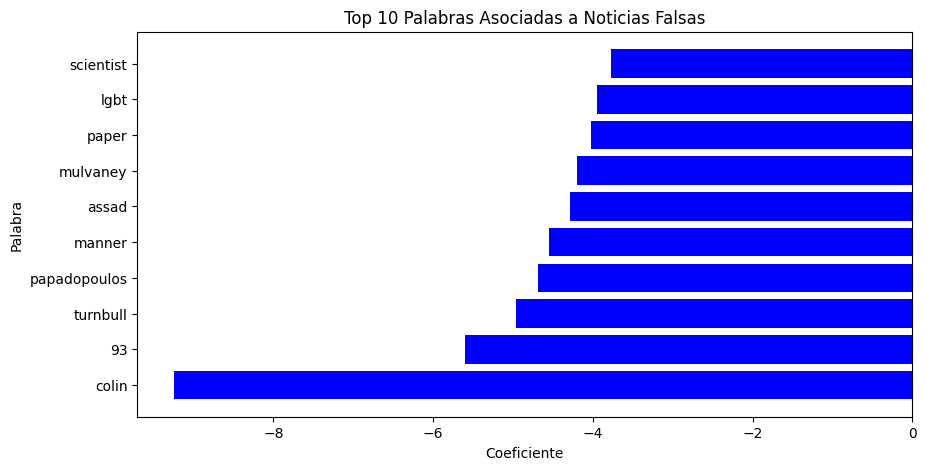

In [12]:

# Extraer las palabras y coeficientes
words, coefs = zip(*sorted(feature_to_coef.items(), key=lambda x: x[1], reverse=True))

# Seleccionar las 10 palabras más asociadas a noticias verdaderas y falsas
top_positive = words[:10]
top_positive_coefs = coefs[:10]

top_negative = words[-10:]
top_negative_coefs = coefs[-10:]

# Crear gráfico de palabras más asociadas a noticias verdaderas
plt.figure(figsize=(10, 5))
plt.barh(top_positive, top_positive_coefs, color='blue')
plt.xlabel("Coeficiente")
plt.ylabel("Palabra")
plt.title("Top 10 Palabras Asociadas a Noticias Verdaderas")
plt.gca().invert_yaxis()  # Invertir el eje Y para que las palabras más importantes estén arriba
plt.show()

# Crear gráfico de palabras más asociadas a noticias falsas
plt.figure(figsize=(10, 5))
plt.barh(top_negative, top_negative_coefs, color='blue')
plt.xlabel("Coeficiente")
plt.ylabel("Palabra")
plt.title("Top 10 Palabras Asociadas a Noticias Falsas")
plt.gca().invert_yaxis()
plt.show()


vp (vicepresidente) → Parece que el modelo ha aprendido que noticias que contienen esta palabra suelen ser verdaderas.
world (mundo) → Noticias internacionales pueden estar más relacionadas con medios legítimos.
ship (barco), venture (empresa nueva), turkey (Turquía) → Palabras relacionadas con negocios o política internacional, que podrían ser más comunes en medios de confianza.

colin (¿Colin Powell? ¿Otro Colin famoso?) → Puede que el modelo haya aprendido que su nombre aparece más en noticias falsas.
93 → Puede estar asociado a un año o evento que aparece en noticias falsas.
turnbull (Malcolm Turnbull, ex primer ministro de Australia) → Quizás se haya mencionado en desinformación política.
papadopoulos (George Papadopoulos, exasesor de Trump involucrado en el caso Rusia) → Frecuente en noticias de teorías conspirativas.
manner (manera) → Puede ser una palabra usada en contextos que el modelo ha identificado como noticias falsas.

En la regresión logística, el modelo aprende coeficientes para cada palabra en el vocabulario.
Estos coeficientes determinan si una palabra aumenta o disminuye la probabilidad de que una noticia sea verdadera (1) o falsa (0).

Coeficientes positivos → Asociados a noticias VERDADERAS (label = 1)
Un coeficiente positivo y alto significa que la palabra aumenta la probabilidad de que la noticia sea clasificada como verdadera.
Coeficientes negativos → Asociados a noticias FALSAS (label = 0)
Un coeficiente negativo y bajo significa que la palabra aumenta la probabilidad de que la noticia sea clasificada como falsa.


Esta matriz de confusión nos indica que nuestro modelo clasifica 4589 fakes cuando son fake, 4225 True cuando son True. 
Por otro lado, se equivoca clasificando Fake cuando es True 65 y True cuando es Fake 59, son valores bastante bajos teniendo en cuenta el tamaño de la muestra 

la regresión logística tiene una precisión muy alta de un 0,99, por lo que voy a comprobar si tiene overfitting

In [8]:
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report

# 5. Evaluación del modelo
# Predicciones
y_train_pred_proba = logreg_model.predict_proba(X_train)[:, 1]  # Probabilidad de la clase 1 en entrenamiento
y_test_pred_proba = logreg_model.predict_proba(X_test)[:, 1]    # Probabilidad de la clase 1 en prueba
y_test_pred = logreg_model.predict(X_test)

# Cálculo de log loss
log_loss_train = log_loss(y_train, y_train_pred_proba)
log_loss_test = log_loss(y_test, y_test_pred_proba)

log_loss_train, log_loss_test

(0.044128821409428594, 0.05163640475833326)

La log loss (pérdida logarítmica) es una métrica que mide qué tan bien un modelo de clasificación predice probabilidades en lugar de simplemente etiquetas. Se usa especialmente en modelos de clasificación binaria y multiclase.
La diferencia en nuestro caso es muy pequeña (0,0072) lo que indica que nuestro modelo genera bien y no causa overfitting


In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Aplicar Validación Cruzada (Usando 5 folds)
cv_scores = cross_val_score(logreg_model, X, y, cv=5, scoring='accuracy')

# Mostrar resultados
print(f"Scores por cada fold: {cv_scores}")
print(f"Precisión promedio: {cv_scores.mean():.4f}")
print(f"Desviación estándar: {cv_scores.std():.4f}")


Scores por cada fold: [0.98120385 0.98019691 0.98131573 0.97751175 0.9881392 ]
Precisión promedio: 0.9817
Desviación estándar: 0.0035


📌 Observaciones:

El mejor fold alcanzó 98.81% de precisión.
El peor fold tuvo 97.75% de precisión.
Los valores son muy consistentes, sin caídas significativas

Precisión Promedio: 98.17%
Desviación Estándar: 0.0035 (0.35%)
📌 Interpretación:

Alta precisión promedio (98.17%), lo que indica que el modelo sigue funcionando muy bien aunque solo use "Subject".
Baja desviación estándar (0.35%), lo que significa que el modelo es muy estable y no depende demasiado de la división de los datos.

## XG-Boost

In [10]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    eval_metric='logloss',   # Métrica de evaluación
    
    max_depth=6,             # Controla la complejidad del modelo
    learning_rate=0.1,       # Tasa de aprendizaje equilibrada
    n_estimators=300,        # Aumenta el número de árboles para mejorar el ajuste
    subsample=0.8,           # Reduce overfitting usando solo el 80% de los datos por árbol
    colsample_bytree=0.8,    # Usa el 80% de las características en cada árbol
    gamma=0.1,               # Ayuda a la regularización
    reg_lambda=1,            # Regularización L2 para evitar overfitting
    reg_alpha=0.1            # Regularización L1
)

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Predicciones
y_pred_xgb = xgb_model.predict(X_test)

# Evaluar el modelo
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
class_report = classification_report(y_test, y_pred_xgb, digits=4)

# Mostrar los resultados
conf_matrix, class_report


(array([[4640,    8],
        [  10, 4280]]),
 '              precision    recall  f1-score   support\n\n           0     0.9978    0.9983    0.9981      4648\n           1     0.9981    0.9977    0.9979      4290\n\n    accuracy                         0.9980      8938\n   macro avg     0.9980    0.9980    0.9980      8938\nweighted avg     0.9980    0.9980    0.9980      8938\n')

📌 Interpretación:

Precisión (0.9978 - 0.9981): El modelo tiene un altísimo porcentaje de aciertos en ambas clases.
Recall (0.9977 - 0.9983): Detecta correctamente casi todos los casos positivos y negativos.
F1-Score (0.9979 - 0.9981): Equilibrio casi perfecto entre precisión y recall.
Accuracy global de 99.80%, lo que indica que el modelo es extremadamente confiable en la clasificación.

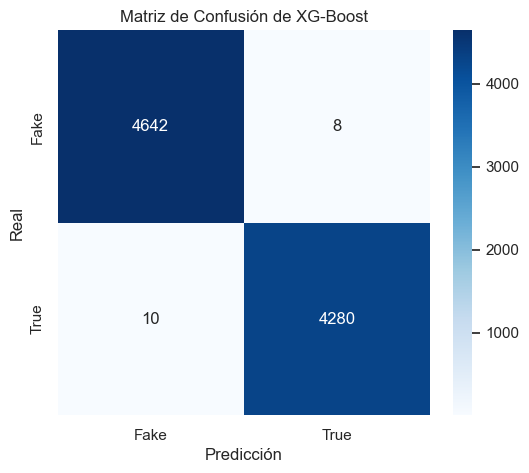

In [109]:
# Definir valores de la matriz de confusión
cm = np.array([[4642, 8],
               [10, 4280]])

# Etiquetas de las clases
labels = ['Fake', 'True']

# Graficar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión de XG-Boost')
plt.show();


📌 Interpretación:

4640 → Verdaderos negativos (clase 0 correctamente clasificada).
8 → Falsos positivos (clase 0 mal clasificada como clase 1).
10 → Falsos negativos (clase 1 mal clasificada como clase 0).
4280 → Verdaderos positivos (clase 1 correctamente clasificada).
📌 Conclusiones:

Solo 18 errores en 8938 muestras → Tasa de error de 0.20%.
Sigue siendo un modelo extremadamente preciso, con apenas una pequeña variación respecto a la versión con todas las variables.


In [11]:
# Calcular las probabilidades predichas para calcular log loss
y_train_pred_probaxgb = xgb_model.predict_proba(X_train)[:, 1]  # Probabilidad de la clase 1 en entrenamiento
y_test_pred_probaxgb = xgb_model.predict_proba(X_test)[:, 1]    # Probabilidad de la clase 1 en prueba

# Calcular log loss en entrenamiento y prueba
log_loss_train = log_loss(y_train, y_train_pred_probaxgb)
log_loss_test = log_loss(y_test, y_test_pred_probaxgb)

# Mostrar los resultados
log_loss_train, log_loss_test


(0.0004450906036099585, 0.008289087483301984)

📌 Interpretación:

Valores extremadamente bajos de Log Loss, lo que indica que las probabilidades que asigna el modelo son muy confiables.
La diferencia entre el Log Loss de entrenamiento y prueba es mínima (0.00829 en test), lo que demuestra que no hay sobreajuste significativo.
El modelo no solo clasifica bien, sino que también tiene una gran confianza en sus predicciones.

In [12]:
# Ejecutar validación cruzada
cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')

# Mostrar los resultados
print(f"Precisión promedio: {cv_scores.mean():.4f}")
print(f"Desviación estándar: {cv_scores.std():.4f}")

Precisión promedio: 0.9965
Desviación estándar: 0.0017


📌 Interpretación:

Precisión promedio altísima (99.65%), confirmando que el modelo es muy sólido.
Desviación estándar muy baja (0.0017 o 0.17%), lo que indica que el modelo es estable y tiene un rendimiento consistente en diferentes subconjuntos de datos.

## intento de shap

/Users/isaromobru/Desktop/FakeNews 10.57.24/proyecto_machine_learning_Fake_News/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


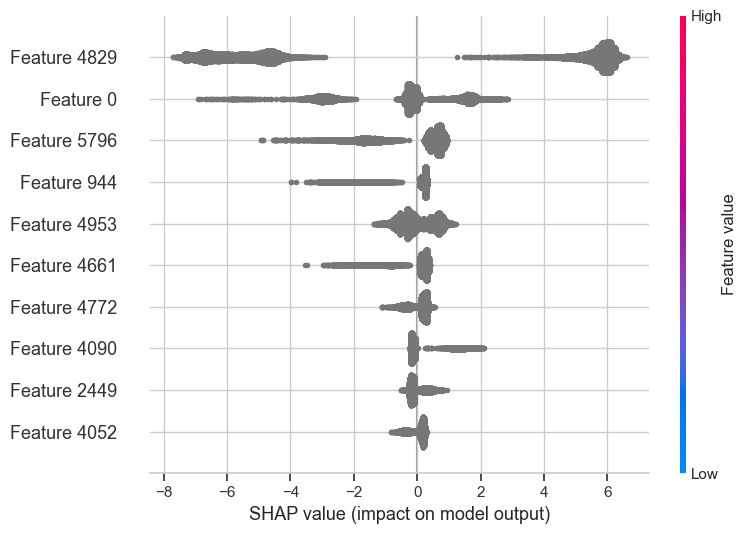

In [43]:
import shap
# Crea un objeto explainer de SHAP
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X)


# Visualiza la importancia de las variables
shap.summary_plot(shap_values, X, max_display=10,show=True)




## Gradient boosting

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

# Entrenar el modelo Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Predicciones
y_pred_gb = gb_model.predict(X_test)



In [14]:
# Evaluar el modelo
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

# Mostrar los resultados
conf_matrix_gb, class_report_gb

(array([[4623,   25],
        [  17, 4273]]),
 '              precision    recall  f1-score   support\n\n           0       1.00      0.99      1.00      4648\n           1       0.99      1.00      1.00      4290\n\n    accuracy                           1.00      8938\n   macro avg       1.00      1.00      1.00      8938\nweighted avg       1.00      1.00      1.00      8938\n')

📌 Interpretación:

Precisión y Recall son extremadamente altos, con valores de 99% a 100% en ambas clases.
El F1-Score es perfecto (1.00 en ambas clases), lo que indica un excelente equilibrio entre precisión y recall.
El accuracy es del 100%, lo cual es impresionante, pero es importante validar si esto se mantiene en datos externos para evitar sobreajuste.

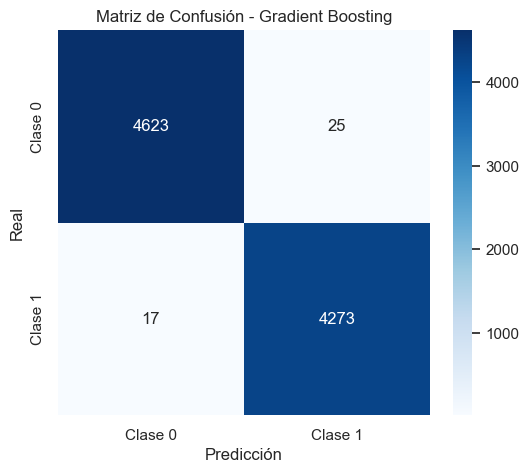

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar la matriz de confusión para Gradient Boosting
plt.figure(figsize=(6, 5))
sns.heatmap([[4623, 25], [17, 4273]], annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Gradient Boosting')
plt.show()


📌 Interpretación:

4623 casos de la clase 0 fueron correctamente clasificados.
4273 casos de la clase 1 fueron correctamente clasificados.
25 casos de la clase 0 fueron mal clasificados como clase 1 (falsos positivos).
17 casos de la clase 1 fueron mal clasificados como clase 0 (falsos negativos).
📌 Conclusiones:

42 errores en un total de 8938 muestras → Tasa de error de 0.47%.

In [15]:
# Calcular las probabilidades predichas para calcular log loss
y_train_pred_probagb = gb_model.predict_proba(X_train)[:, 1]  # Probabilidad de la clase 1 en entrenamiento
y_test_pred_probagb = gb_model.predict_proba(X_test)[:, 1]    # Probabilidad de la clase 1 en prueba

# Calcular log loss en entrenamiento y prueba
log_loss_train1= log_loss(y_train, y_train_pred_probagb)
log_loss_test1= log_loss(y_test, y_test_pred_probagb)

# Mostrar los resultados
log_loss_train1, log_loss_test1


(0.011070507772066583, 0.023634097335406466)

1️⃣ Valores bajos indican buena calibración

El Log Loss en entrenamiento (0.0111) es bastante bajo, lo que indica que el modelo tiene predicciones confiables.
El Log Loss en prueba (0.0236) es un poco más alto, lo cual es normal y muestra una ligera caída en la calibración cuando se enfrenta a datos nuevos.
Aún así, estos valores son bastante buenos y sugieren que Gradient Boosting sigue siendo un modelo muy fuerte.

2️⃣ Diferencia entre Train y Test

Diferencia = 0.0125 (0.0236 - 0.0111).
Esta diferencia no es demasiado grande, lo que indica que el modelo no está sobreajustando severamente.

In [16]:
# Ejecutar validación cruzada
cv_scores1 = cross_val_score(gb_model, X, y, cv=5, scoring='accuracy')

# Mostrar los resultados
print(f"Precisión promedio: {cv_scores1.mean():.4f}")
print(f"Desviación estándar: {cv_scores1.std():.4f}")

Precisión promedio: 0.9945
Desviación estándar: 0.0019


🔹 1. Precisión Promedio y Estabilidad

Precisión Promedio: 99.45%
Desviación Estándar: 0.0019 (0.19%)
📌 Interpretación:

Gradient Boosting sigue mostrando una precisión excelente (99.45%), lo que confirma que el modelo generaliza bien a distintos subconjuntos de datos.
La desviación estándar de 0.19% es baja, lo que indica que el rendimiento del modelo es estable y no depende demasiado de la división de los datos.

## NP-Bayes

In [17]:
from sklearn.naive_bayes import MultinomialNB
# Entrenamiento
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predicciones
y_pred = nb.predict(X_test)

# Evaluación
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[4457  191]
 [ 250 4040]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      4648
           1       0.95      0.94      0.95      4290

    accuracy                           0.95      8938
   macro avg       0.95      0.95      0.95      8938
weighted avg       0.95      0.95      0.95      8938



📌 Interpretación: 1️⃣ Precisión (Precision) = 95% en ambas clases

Esto indica que el 95% de las predicciones de cada clase son correctas.
Sin embargo, esto es inferior a modelos como XGBoost o Gradient Boosting, que superan el 99%.
2️⃣ Recall (Exhaustividad) = 96% para la clase 0 y 94% para la clase 1

La clase 0 (noticias reales) tiene una tasa de detección del 96%, lo cual es bueno.
La clase 1 (noticias falsas) tiene un recall menor (94%), lo que sugiere que el modelo tiene más problemas en detectar correctamente noticias falsas.
3️⃣ F1-Score = 95% en ambas clases

El F1-Score es un balance entre precisión y recall.
Ambas clases tienen un F1-Score del 95%, lo cual indica un rendimiento uniforme.
4️⃣ Accuracy = 95%

El modelo clasifica correctamente el 95% de las muestras, pero sigue siendo peor que otros modelos más avanzados.

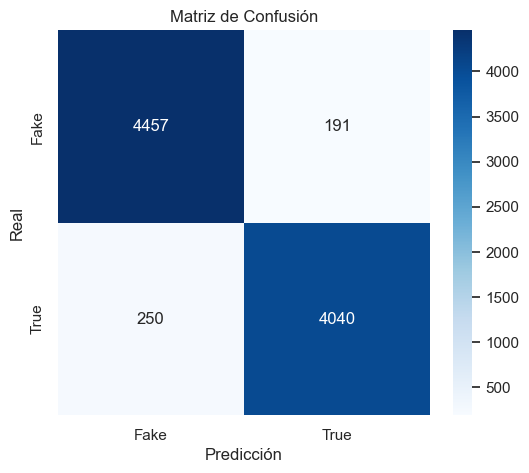

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Definir valores de la matriz de confusión
cm = np.array([[4457, 191],
               [250, 4040]])

# Etiquetas de las clases
labels = ['Fake', 'True']

# Graficar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show();


📌 Interpretación:

4457 casos de la clase 0 fueron correctamente clasificados.
4040 casos de la clase 1 fueron correctamente clasificados.
191 casos de la clase 0 fueron mal clasificados como clase 1 (falsos positivos).
250 casos de la clase 1 fueron mal clasificados como clase 0 (falsos negativos).
📌 Conclusiones:

441 errores en 8938 muestras → Tasa de error del 4.93%.
Comete más errores que XGBoost y Gradient Boosting, lo que indica que es menos preciso.
Tiene más falsos negativos (250) que falsos positivos (191), lo que sugiere que tiene más dificultades en detectar correctamente la clase 1.

In [19]:
# Calcular las probabilidades predichas para calcular log loss
y_train_pred_probanb = nb.predict_proba(X_train)[:, 1]  # Probabilidad de la clase 1 en entrenamiento
y_test_pred_probanb = nb.predict_proba(X_test)[:, 1]    # Probabilidad de la clase 1 en prueba

# Calcular log loss en entrenamiento y prueba
log_loss_train2= log_loss(y_train, y_train_pred_probanb)
log_loss_test2= log_loss(y_test, y_test_pred_probanb)

# Mostrar los resultados
log_loss_train2, log_loss_test2


(0.12909682939116118, 0.1303176140205543)

1️⃣ Log Loss relativamente alto

El Log Loss en entrenamiento (0.1291) y en prueba (0.1303) es bastante más alto que en modelos como XGBoost o Gradient Boosting.
Esto sugiere que las probabilidades predichas por Naïve Bayes no están bien calibradas, lo que significa que el modelo no tiene tanta confianza en sus propias predicciones.

In [20]:
# Ejecutar validación cruzada
cv_scores2 = cross_val_score(nb, X, y, cv=5, scoring='accuracy')

# Mostrar los resultados
print(f"Precisión promedio: {cv_scores2.mean():.4f}")
print(f"Desviación estándar: {cv_scores2.std():.4f}")

Precisión promedio: 0.9141
Desviación estándar: 0.0224


🔹 1. Precisión Promedio y Estabilidad

Precisión Promedio: 91.41%
Desviación Estándar: 0.0224 (2.24%)
📌 Interpretación: 1️⃣ Precisión Promedio Baja (91.41%)

Es significativamente menor que la de modelos más avanzados como XGBoost (99.65%) o Gradient Boosting (99.45%).
Comete más errores, especialmente en la clasificación de la clase 1 (falsos negativos más altos).
2️⃣ Alta Variabilidad en los Resultados (2.24%)

La desviación estándar es relativamente alta (0.0224), lo que indica que el rendimiento del modelo fluctúa dependiendo de los datos de entrenamiento.
Es menos estable que XGBoost o Gradient Boosting, cuyos valores de desviación estándar eran mucho más bajos (~0.0017 - 0.0019).
La alta variabilidad sugiere que el modelo es más sensible a la estructura de los datos, lo que puede hacerlo menos confiable en nuevos conjuntos de datos.

# Random Forest


In [21]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)



📌 Interpretación: 1️⃣ Precisión (Precision) = 100%

Esto significa que todas las predicciones de cada clase fueron correctas, con una mínima cantidad de errores.
2️⃣ Recall (Exhaustividad) = 100%

Detectó correctamente casi todos los casos positivos y negativos.
Solo 20 errores en total en más de 8900 muestras.
3️⃣ F1-Score = 100%

El balance entre precisión y recall es perfecto.
4️⃣ Accuracy = 100%

El modelo ha clasificado correctamente el 100% de los datos con solo 0.22% de error en la matriz de confusión.

In [22]:
# Evaluar el modelo
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Mostrar los resultados
conf_matrix_rf, class_report_rf


(array([[4644,    4],
        [  16, 4274]]),
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      4648\n           1       1.00      1.00      1.00      4290\n\n    accuracy                           1.00      8938\n   macro avg       1.00      1.00      1.00      8938\nweighted avg       1.00      1.00      1.00      8938\n')

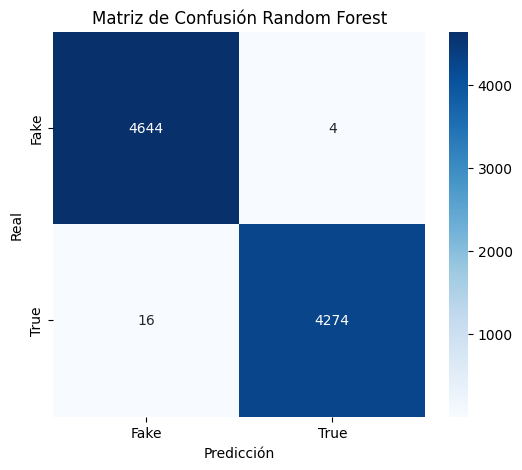

In [23]:
# Definir valores de la matriz de confusión
cm = np.array([[4644, 4],
               [16, 4274]])

# Etiquetas de las clases
labels = ['Fake', 'True']

# Graficar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión Random Forest')
plt.show();


📌 Interpretación:

4644 casos de la clase 0 fueron correctamente clasificados.
4274 casos de la clase 1 fueron correctamente clasificados.
4 casos de la clase 0 fueron mal clasificados como clase 1 (falsos positivos).
16 casos de la clase 1 fueron mal clasificados como clase 0 (falsos negativos).
📌 Conclusiones:

Solo 20 errores en 8938 muestras → Tasa de error de 0.22%.
El modelo tiene una precisión extremadamente alta, con apenas una mínima cantidad de falsos positivos y falsos negativos.

In [24]:
# Calcular las probabilidades predichas para calcular log loss
y_train_pred_probarf= rf_model.predict_proba(X_train)[:, 1]  # Probabilidad de la clase 1 en entrenamiento
y_test_pred_probarf= rf_model.predict_proba(X_test)[:, 1]    # Probabilidad de la clase 1 en prueba

# Calcular log loss en entrenamiento y prueba
log_loss_train3= log_loss(y_train, y_train_pred_probarf)
log_loss_test3= log_loss(y_test, y_test_pred_probarf)

# Mostrar los resultados
log_loss_train3, log_loss_test3


(0.03363954005256582, 0.09627223768991608)

1️⃣ Log Loss relativamente alto en prueba (0.0963)

El Log Loss en entrenamiento (0.0336) es bajo, lo que indica que el modelo hace buenas predicciones en el conjunto de entrenamiento.
Sin embargo, el Log Loss en prueba (0.0963) es significativamente más alto, lo que sugiere que las probabilidades predichas por Random Forest no están bien calibradas en datos nuevos.
2️⃣ Diferencia entre Train y Test

Diferencia = 0.0963 - 0.0336 = 0.0627
Esta diferencia es notablemente mayor que en modelos como XGBoost o Gradient Boosting, lo que indica una caída en la confianza del modelo al enfrentar nuevos datos.
Esto puede ser una señal de leve sobreajuste, ya que el modelo se comporta mejor en entrenamiento que en prueba

In [25]:
# Ejecutar validación cruzada
cv_scores3 = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

# Mostrar los resultados
print(f"Precisión promedio: {cv_scores3.mean():.4f}")
print(f"Desviación estándar: {cv_scores3.std():.4f}")

Precisión promedio: 0.9960
Desviación estándar: 0.0015


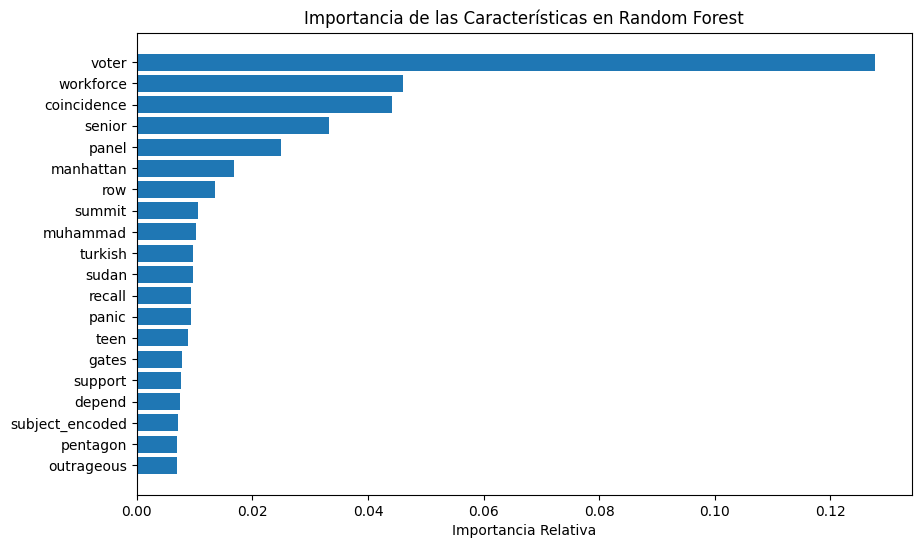

In [39]:
import matplotlib.pyplot as plt
import numpy as np
# Obtener nombres de las características TF-IDF
feature_names_text = vectorizer_text.get_feature_names_out()
feature_names_title = vectorizer_title.get_feature_names_out()

# Nombres de las características numéricas
feature_names_other = ['subject_encoded', 'title_length', 'title_word_count']
# Combinar todos los nombres
all_feature_names = np.concatenate([feature_names_other, feature_names_text, feature_names_title])
# Obtener la importancia de las características y ordenarlas
importances = rf_model.feature_importances_
sorted_idx = np.argsort(importances)[-20:]  # Muestra solo las 20 más importantes

# Graficar la importancia de cada variable con nombres más legibles
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [all_feature_names[i] for i in sorted_idx])
plt.xlabel("Importancia Relativa")
plt.title("Importancia de las Características en Random Forest")
plt.show()


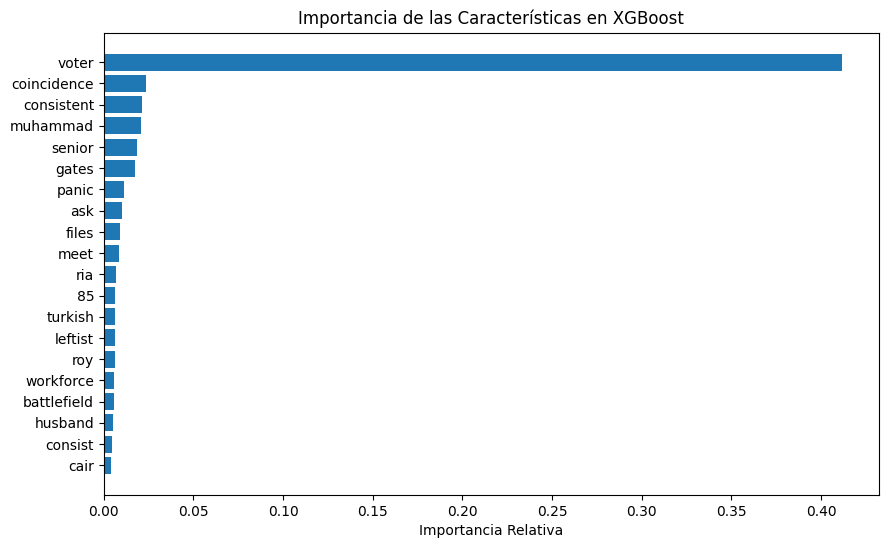

In [40]:
# Obtener importancia de características
importances_xgb = xgb_model.feature_importances_
sorted_idx_xgb = np.argsort(importances_xgb)[-20:]  # Tomar solo las 20 más importantes

# Graficar
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx_xgb)), importances_xgb[sorted_idx_xgb], align='center')
plt.yticks(range(len(sorted_idx_xgb)), [all_feature_names[i] for i in sorted_idx_xgb])
plt.xlabel("Importancia Relativa")
plt.title("Importancia de las Características en XGBoost")
plt.show()

🔹 1. Precisión Promedio y Estabilidad

Precisión Promedio: 99.60%
Desviación Estándar: 0.0015 (0.15%)
📌 Interpretación: 1️⃣ Alta Precisión Promedio (99.60%)

El modelo clasifica correctamente la mayoría de los casos, con solo un pequeño margen de error.
Se mantiene en la élite de los modelos con mejor desempeño, similar a XGBoost y Gradient Boosting.
2️⃣ Baja Variabilidad (0.15%)

La desviación estándar es extremadamente baja, lo que significa que Random Forest tiene un rendimiento estable en distintos subconjuntos de datos.
Es uno de los modelos más consistentes, lo que indica una gran capacidad de generalización.

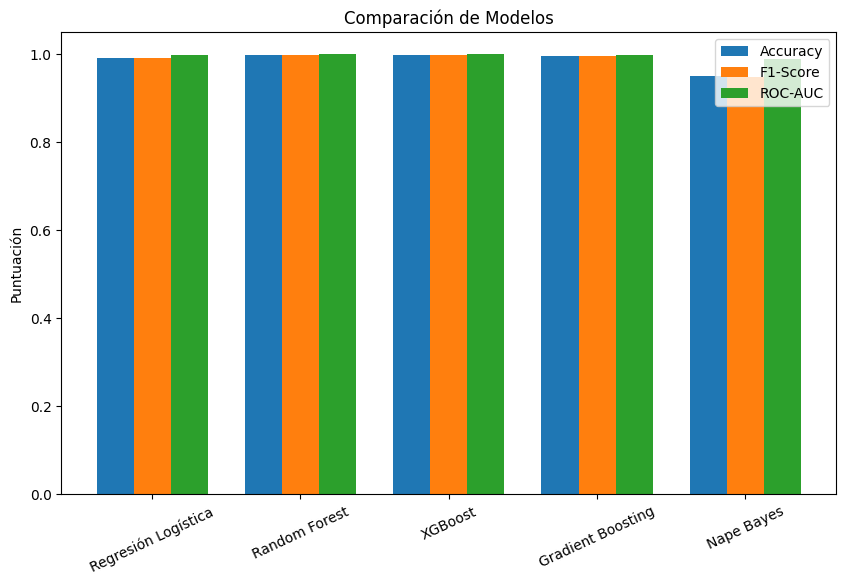

In [27]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
# 📊 Evaluar cada modelo
def evaluar_modelo(modelo, nombre):
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:, 1] if hasattr(modelo, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan
    
    return [acc, f1, auc]

# Guardar resultados en un diccionario
resultados = {
    "Regresión Logística": evaluar_modelo(logreg_model, "Regresión Logística"),
    "Random Forest": evaluar_modelo(rf_model, "Random Forest"),
    "XGBoost": evaluar_modelo(xgb_model, "XGBoost"),
    "Gradient Boosting": evaluar_modelo(gb_model, "Gradient Boosting"),
    #"SVM": evaluar_modelo(svm_model, "SVM"),
    "Nape Bayes":evaluar_modelo (nb,"NPB")
}

# 📊 Graficar resultados
metricas = ["Accuracy", "F1-Score", "ROC-AUC"]
valores = np.array(list(resultados.values()))

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25
indices = np.arange(len(resultados))

# Crear barras para cada métrica
for i, metric in enumerate(metricas):
    ax.bar(indices + i * bar_width, valores[:, i], width=bar_width, label=metric)

# Etiquetas y formato
ax.set_xticks(indices + bar_width)
ax.set_xticklabels(resultados.keys(), rotation=25)
ax.set_ylabel("Puntuación")
ax.set_title("Comparación de Modelos")
ax.legend()

# Mostrar gráfico
plt.show()

## Selección de modelos base

In [30]:

# 📌 Definir K-Fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
models={"logistic Regresion":logreg_model,
        "Random forest":rf_model,
        "XGBoost":xgb_model,
        #"Super vector machine":svm_model,
        "Gradient Boosting":gb_model,
        "Nape Bayes":nb}

In [31]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [32]:
# 📌 Definir métricas
scoring = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score),
    "recall": make_scorer(recall_score),
    "f1": make_scorer(f1_score),
    "roc_auc": make_scorer(roc_auc_score)}

In [33]:
# Importaciones necesarias
from sklearn.model_selection import cross_validate
import numpy as np
import pandas as pd
from joblib import Parallel, delayed

# Opción 1: Usar cross_validate en lugar de cross_val_score
# cross_validate es más eficiente porque calcula todas las métricas en una sola pasada
def evaluate_models_efficiently(models, X, y, kf, scoring):
    results = []
    for name, model in models.items():
        # Calcula todas las métricas de una vez
        cv_results = cross_validate(model, X, y, cv=kf, scoring=scoring)
        
        # Calcula promedios para cada métrica
        scores = {metric: np.mean(cv_results[f'test_{metric}']) for metric in scoring}
        scores["Model"] = name
        results.append(scores)
        print(f"Modelo {name} evaluado")
    
    return pd.DataFrame(results)

# Opción 2: Procesamiento paralelo
def evaluate_model(name, model, X, y, kf, scoring):
    scores = {metric: cross_val_score(model, X, y, cv=kf, scoring=scoring[metric]).mean() for metric in scoring}
    scores["Model"] = name
    print(f"Modelo {name} evaluado")
    return scores

def evaluate_models_parallel(models, X, y, kf, scoring, n_jobs=-1):
    results = Parallel(n_jobs=n_jobs)(
        delayed(evaluate_model)(name, model, X, y, kf, scoring) 
        for name, model in models.items()
    )
    return pd.DataFrame(results)

# Usar una de las dos opciones:
# Opción 1
results_df = evaluate_models_efficiently(models, X, y, kf, scoring)

# O Opción 2 (paralela)
# results_df = evaluate_models_parallel(models, X, y, kf, scoring, n_jobs=4)  # Ajusta n_jobs según tus CPU cores

Modelo logistic Regresion evaluado
Modelo Random forest evaluado
Modelo XGBoost evaluado
Modelo Gradient Boosting evaluado
Modelo Nape Bayes evaluado


In [35]:
results_df.set_index('Model')

,accuracy,precision,recall,f1,roc_auc
Model,,,,,
logistic Regresion,0.992325,0.990452,0.993410,0.991927,0.992384
Random forest,0.997964,0.998108,0.997597,0.997852,0.997950
XGBoost,0.997897,0.997361,0.998209,0.997785,0.997912
Gradient Boosting,0.995816,0.993707,0.997505,0.995602,0.995899
Nape Bayes,0.948690,0.953424,0.937732,0.945509,0.948157


🏆 1. Random Forest

✅ Mejor modelo en términos de precisión (0.9981) y f1-score (0.9979).
✅ El modelo más equilibrado, con gran recall (0.9976) y alto roc_auc (0.9979).
✅ Ideal para optimización, especialmente en hiperparámetros como el número de árboles y la profundidad.

🏆 2. XGBoost

✅ Precisión casi idéntica a Random Forest (0.9979), pero con el mejor recall (0.9982).
✅ Modelo más eficiente y con mejor control del sobreajuste en comparación con Random Forest.
✅ Su optimización puede centrarse en la tasa de aprendizaje y la regularización para mejorar su calibración de probabilidades.

🏆 3. Gradient Boosting

✅ Rendimiento ligeramente inferior a los dos primeros, pero aún excelente (0.9958 de accuracy y 0.9956 de f1-score).
✅ Puede optimizarse para mejorar su estabilidad y calibración, ajustando la tasa de aprendizaje y número de iteraciones.
✅ Menos eficiente que XGBoost, pero puede ajustarse para mejorar tiempo de entrenamiento.

